In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 生成聚类数据
from sklearn.datasets._samples_generator import make_blobs

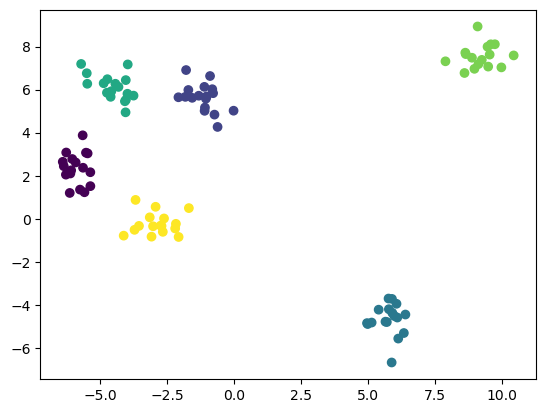

In [6]:
# 数据加载
x, y = make_blobs(n_samples=100, centers=6, random_state=1234, cluster_std=0.6)

x, y

plt.scatter(x[:,0], x[:,1], c=y)

In [16]:
cen = x[[1, 2, 4],:]
cen


dis = cdist(x, cen)
dis

ind = np.argmin(dis, axis=1)
ind

np.mean(x[ind == 1], axis=0)


array([-1.42051378, -0.66584658])

In [41]:
# 算法实现
# 引入欧氏距离函数
from scipy.spatial.distance import cdist

class K_MEANS:
    def __init__(self, n_clusters=6, max_iter=100, centroids=[]):
        self.n_clusters = n_clusters
        self.max_iter=max_iter
        self.centroids = np.array(centroids, dtype=np.float64)
        
    # 训练
    def fit(self, data):
        # 没有初始质心
        if self.centroids.shape == (0,):
            self.centroids = data[np.random.randint(0, data.shape[0], self.n_clusters),:]
            
        #开始迭代
        for i in range(self.max_iter):
            # 计算距离
            distances = cdist(data, self.centroids)
            # 选取最近的质心作为类别
            c_ind = np.argmin(distances, axis=1)
            # 对每一类数据进行均值计算，更新质心点
            for i in range(self.n_clusters):
                if i in c_ind:
                    self.centroids[i] = np.mean(data[c_ind == i], axis=0)
                    
    
    # 预测方法
    def predice(self, samples):
        # 计算距离
        distances = cdist(samples, self.centroids)
        # 选取距离最近的
        c_ind = np.argmin(distances, axis=1)
        return c_ind
        

[1 5] [[ 5.76444812 -4.67941789]
 [-2.89174024 -0.22808556]
 [-5.89115978  2.33887408]
 [-4.53406813  6.11523454]
 [-1.15698106  5.63230377]
 [ 9.20551979  7.56124841]]


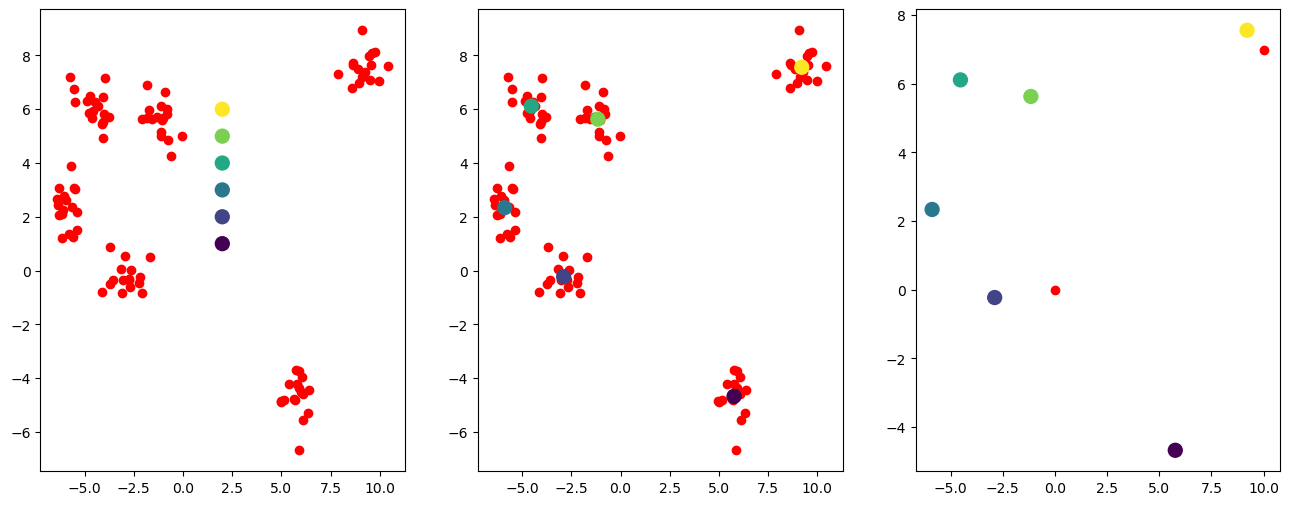

In [42]:
def plotKMean(x, y, centroids, subplot):
    plt.subplot(subplot)
    plt.scatter(x[:,0], x[:,1], c='r')
    
    plt.scatter(centroids[:,0], centroids[:,1], c=np.array(range(6)), s=100)
    

kmeans = K_MEANS(centroids=np.array([[2,1],[2,2],[2,3],[2,4],[2,5],[2,6]]))
plt.figure(figsize=(16,6))
plotKMean(x, y, kmeans.centroids, 131)

kmeans.fit(x)

plotKMean(x, y, kmeans.centroids, 132)

x_new = np.array([[0,0], [10, 7]])

y_pred = kmeans.predice(x_new)

# plt.scatter(x_new[:,0], x_new[:,1], c='y')
plotKMean(x_new, [], kmeans.centroids, 133)

print(y_pred, kmeans.centroids)

    

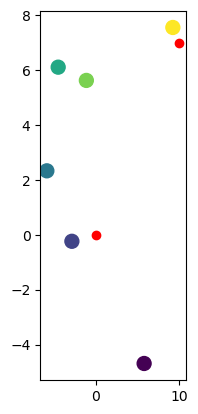